In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import copy, math

In [2]:
df=pd.read_csv('housing.csv',index_col=False)

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

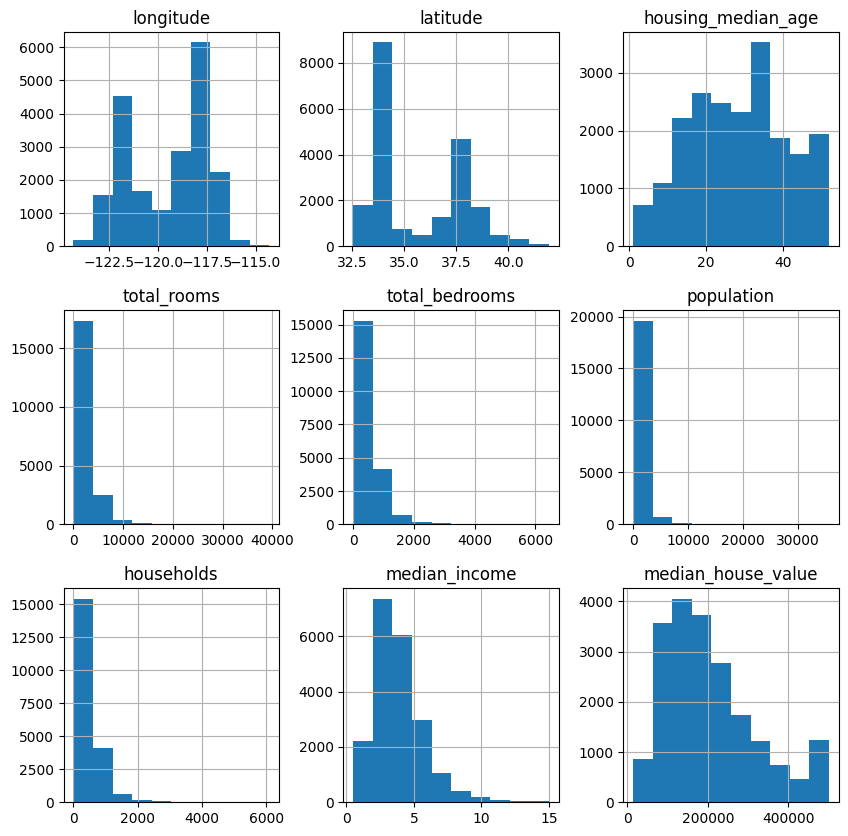

In [10]:
df.hist(figsize=(10,10))

In [11]:
# df=df.drop(['total_rooms_normalized'],axis=1)

C:\Users\ammar\AppData\Local\Temp\ipykernel_21608\2154091323.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


<AxesSubplot: >

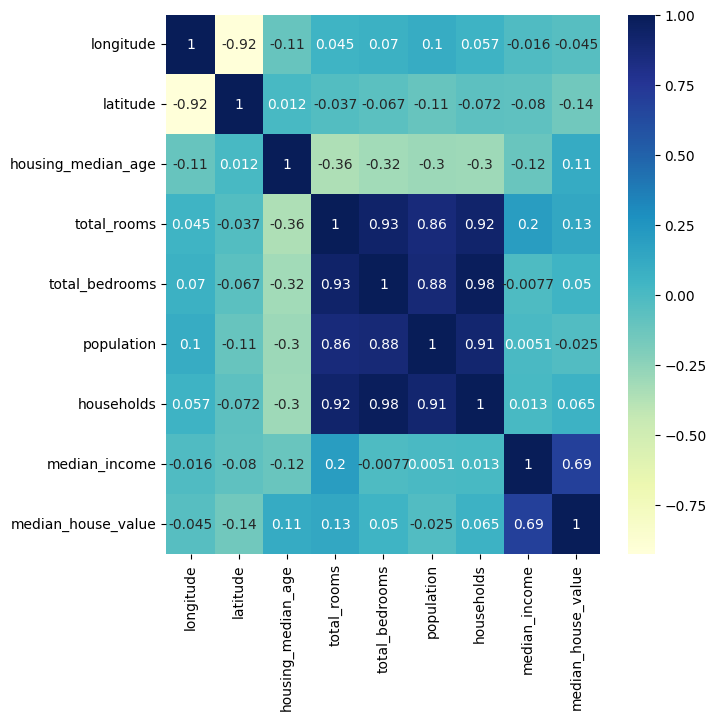

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [13]:
df["total_rooms"]=np.log(df["total_rooms"] +1) 
#since the above hist graphs for these were leftskewed 
#and +1 if zero values exits (since log(1) is not defined)
df["total_bedrooms"]=np.log(df["total_bedrooms"] +1)
df["population"]=np.log(df["population"] +1)
df["households"]=np.log(df["households"] +1)

C:\Users\ammar\AppData\Local\Temp\ipykernel_21608\2302347697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_rooms"]=np.log(df["total_rooms"] +1)
C:\Users\ammar\AppData\Local\Temp\ipykernel_21608\2302347697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bedrooms"]=np.log(df["total_bedrooms"] +1)
C:\Users\ammar\AppData\Local\Temp\ipykernel_21608\2302347697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

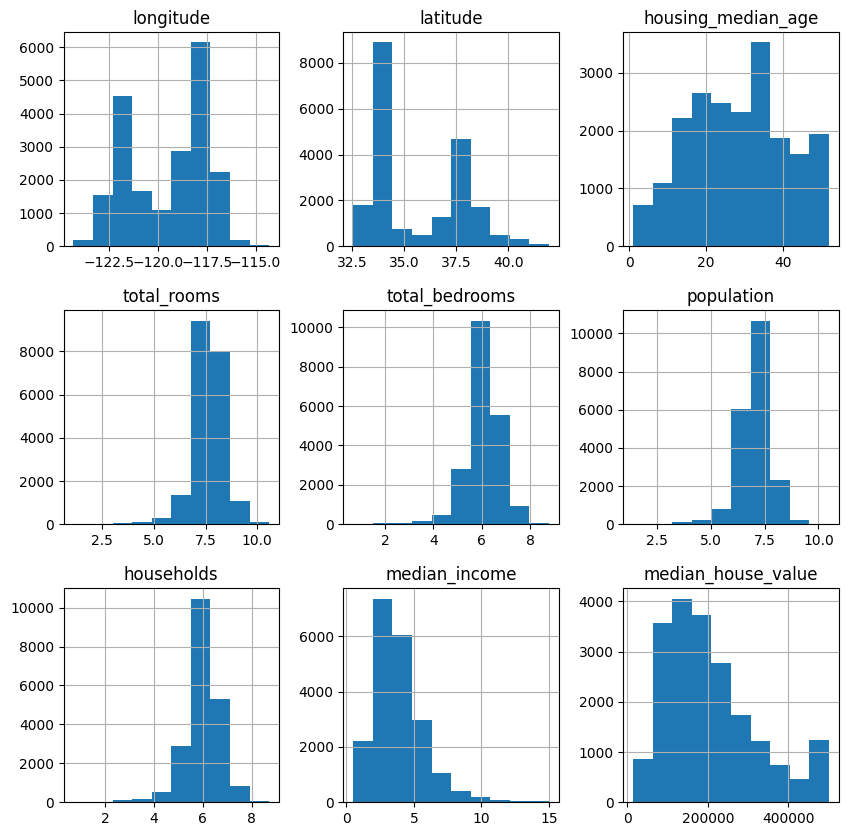

In [14]:
df.hist(figsize=(10,10))

In [15]:
# one hot encoding ocean proximitycolumn

df.ocean_proximity.value_counts()
df=df.join(pd.get_dummies(df.ocean_proximity)).drop(["ocean_proximity"],axis=1)

<AxesSubplot: >

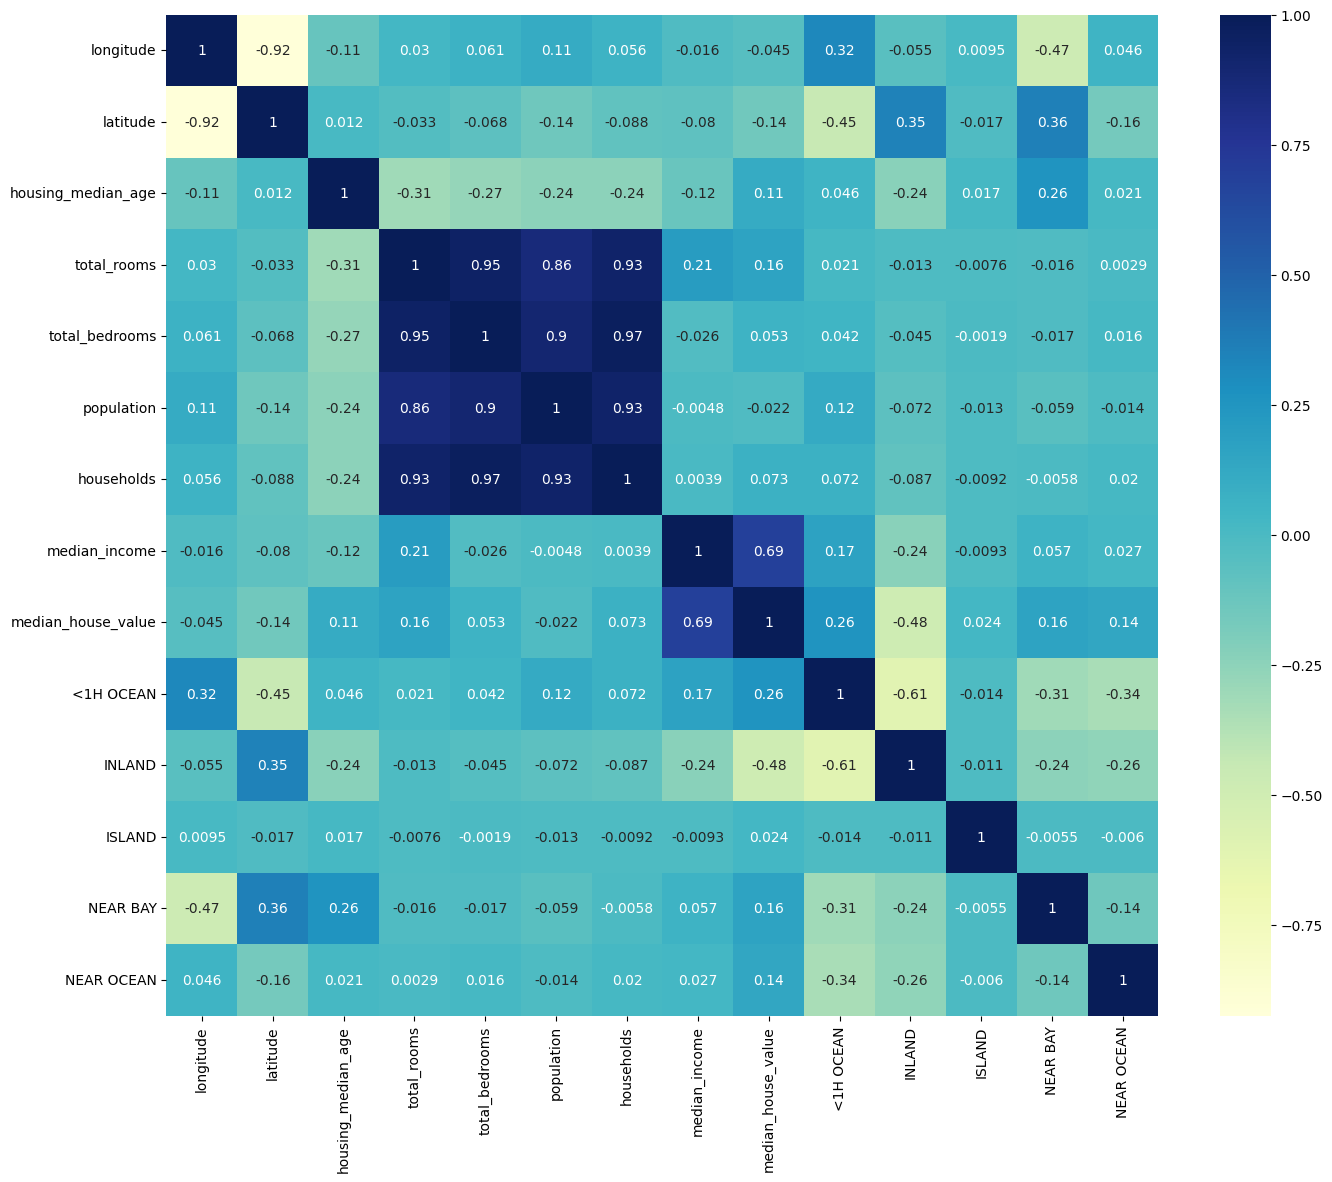

In [16]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

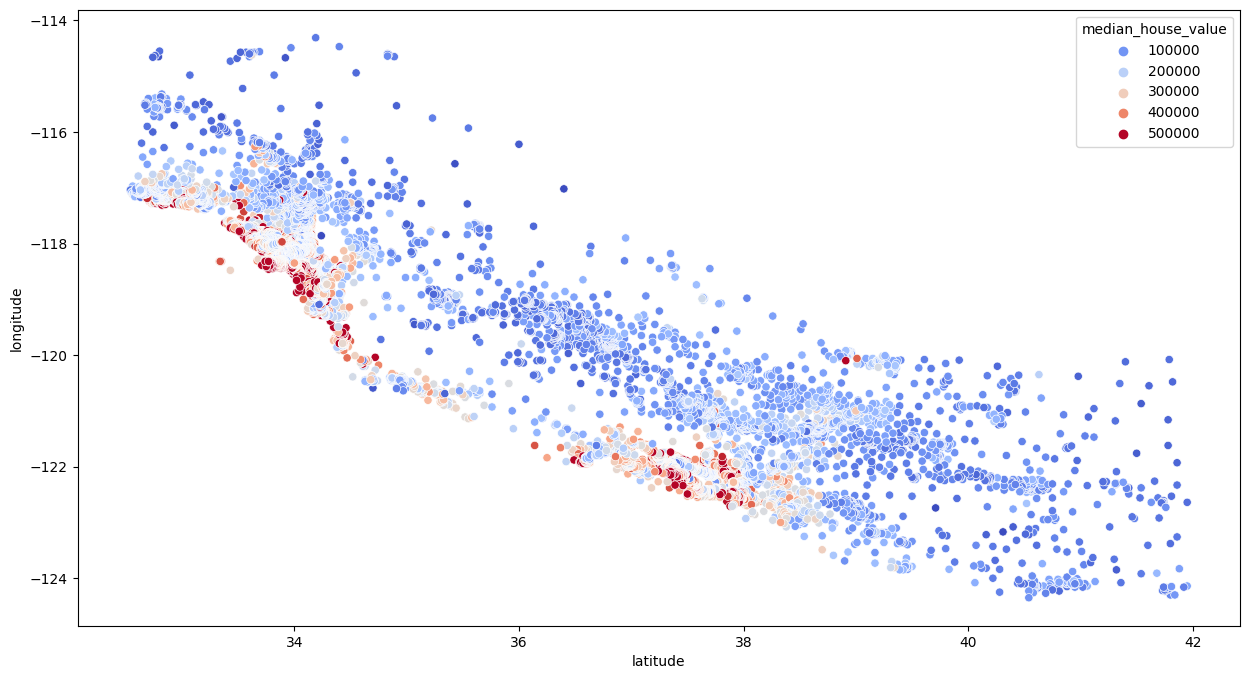

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="latitude",y='longitude',hue="median_house_value",palette='coolwarm')

In [18]:
df["bedroom_ratio"]=df["total_bedrooms"]/df["total_rooms"]
df["household_rooms"]=df["total_rooms"]/df["households"]

<AxesSubplot: >

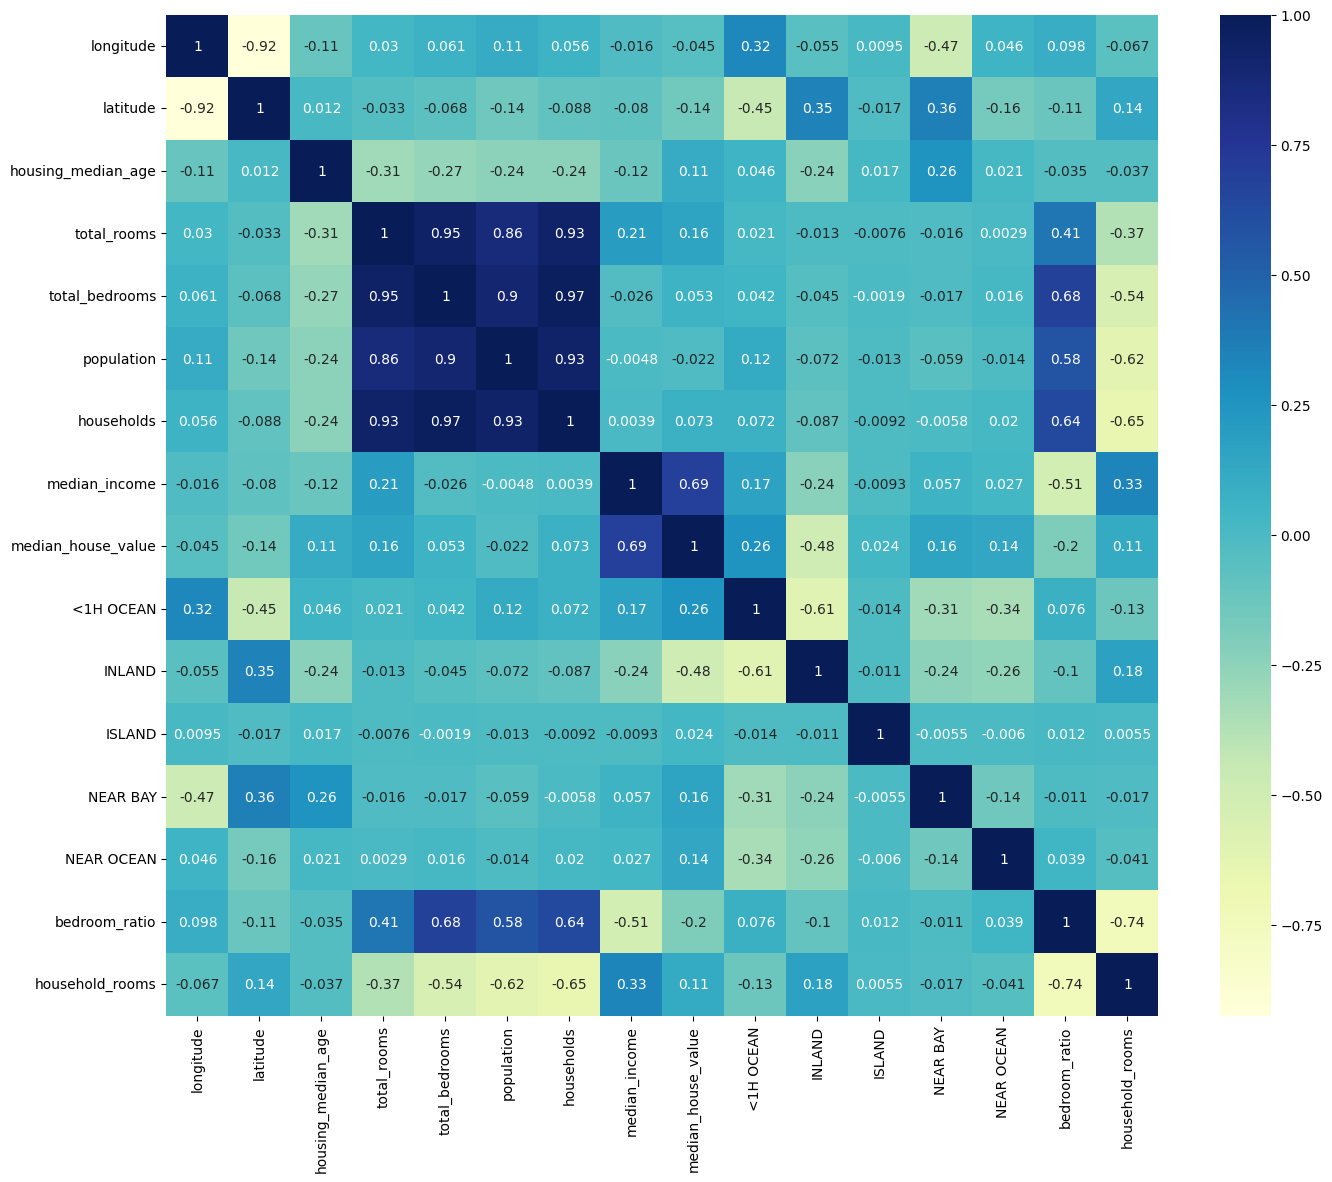

In [19]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [20]:
x , y = df.drop(['median_house_value'],axis=1) , df['median_house_value']

In [21]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,0.799078,1.285243


In [22]:
x_norm = (x-x.mean())/x.std()

In [23]:
x_norm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-1.327281,1.051692,0.982139,-1.130922,-1.633588,-1.694157,-1.568883,2.345106,-0.890217,-0.682697,-0.015644,2.828592,-0.384177,-2.023097,1.506655
1,-1.322290,1.042330,-0.606195,1.650505,1.313698,1.030693,1.449212,2.332575,-0.890217,-0.682697,-0.015644,2.828592,-0.384177,-0.045394,-0.267487
2,-1.332272,1.037649,1.855723,-0.450360,-1.104175,-1.108911,-1.104421,1.782896,-0.890217,-0.682697,-0.015644,2.828592,-0.384177,-1.955027,1.599754
3,-1.337263,1.037649,1.855723,-0.638234,-0.813064,-0.949256,-0.812968,0.932947,-0.890217,-0.682697,-0.015644,2.828592,-0.384177,-0.762550,0.566866
4,-1.337263,1.037649,1.855723,-0.312472,-0.572915,-0.932355,-0.583137,-0.013143,-0.890217,-0.682697,-0.015644,2.828592,-0.384177,-0.807581,0.619191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758299,1.800633,-0.288528,-0.281718,-0.175832,-0.386510,-0.250971,-1.216697,-0.890217,1.464708,-0.015644,-0.353516,-0.384177,0.187293,-0.032529
20636,-0.818192,1.805314,-0.844446,-1.441266,-1.427534,-1.558236,-1.705437,-0.692027,-0.890217,1.464708,-0.015644,-0.353516,-0.384177,-0.705141,1.255558
20637,-0.823183,1.777229,-0.923862,0.121774,0.180948,-0.148570,0.121766,-1.143143,-0.890217,1.464708,-0.015644,-0.353516,-0.384177,0.248720,-0.123755
20638,-0.873094,1.777229,-0.844446,-0.134185,-0.053048,-0.564649,-0.174182,-1.055110,-0.890217,1.464708,-0.015644,-0.353516,-0.384177,0.190165,0.052657


In [24]:
y=y.to_frame()

In [25]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


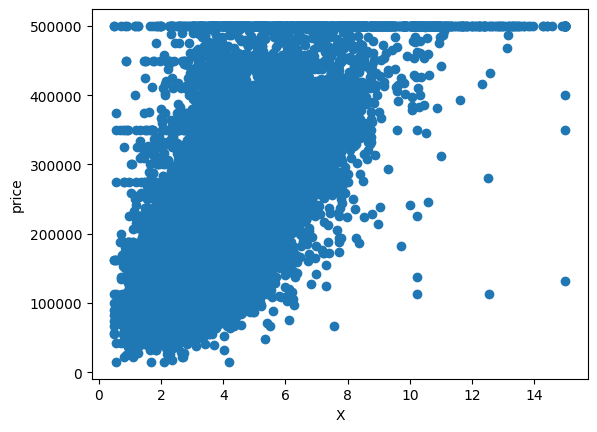

In [26]:
plt.scatter(x['median_income'],y)
plt.xlabel('X')
plt.ylabel("price")
plt.show()

In [27]:
x_np=x_norm.to_numpy()
x_np.shape

(20433, 15)

In [28]:
y_np=y.to_numpy()
y_np.shape

(20433, 1)

In [29]:
x_np , y_np

(array([[-1.32728127,  1.05169153,  0.98213928, ..., -0.38417674,
         -2.02309733,  1.50665535],
        [-1.3222902 ,  1.04232976, -0.60619533, ..., -0.38417674,
         -0.0453941 , -0.26748656],
        [-1.33227234,  1.03764887,  1.85572331, ..., -0.38417674,
         -1.95502705,  1.59975389],
        ...,
        [-0.82318307,  1.77722887, -0.92386225, ..., -0.38417674,
          0.24871976, -0.12375543],
        [-0.87309379,  1.77722887, -0.84444552, ..., -0.38417674,
          0.19016531,  0.05265653],
        [-0.83316522,  1.74914355, -1.00327898, ..., -0.38417674,
          0.48643302, -0.2147422 ]]),
 array([[452600.],
        [358500.],
        [352100.],
        ...,
        [ 92300.],
        [ 84700.],
        [ 89400.]]))

In [30]:
# a1=np.ones(shape=(5,5))
# a1

In [31]:
# a2=np.zeros(shape=(5,4))
# a2

In [32]:
# a1[: , 1:]=a2

In [33]:
# a1

In [34]:
x_norm.shape

(20433, 15)

In [35]:
y.shape

(20433, 1)

In [36]:
def get_predictions(parameter_array,x):
    '''
    obtain predictions for the model(parameters) and inputs (x)
    parameters => np array of shape (p+1,1) p+1 is number of parameters including(theta(0) + theta(n))
    X => np array of shape (n,p) so we add a column of ones as zeroth column before X for 
    '''
    (n,p)=x.shape
    p_plus_one=p+1
    new_x=np.ones(shape=(n,p_plus_one))
    new_x[: , 1:]=x
    
    return np.dot(new_x,parameter_array)



In [37]:
# test_parameters=np.arange(1,17) # => 16 parameters including theta0 and 15 theta other
# # test_parameters
# get_predictions(test_parameters,x).shape

In [38]:

w_init=np.zeros(shape=(15,1))
w_init

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
b_init=0

In [40]:
# def compute_cost(X, y, w, b): 
#     """
#     compute cost
#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters  
#       b (scalar)       : model parameter
      
#     Returns:
#       cost (scalar): cost
#     """
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
#         cost = cost + (f_wb_i - y[i])**2       #scalar
#     cost = cost / (2 * m)                      #scalar    
#     return cost

def cost_function(x,y,w,b):
    '''
    compute cost 
    x => np array of shape (m,n) m training examples with n features
    y => np array of shape(m,1) target values
    w => np array of shape (n,1) parameters for the model 
    b => scalar value  

    returns cost => scalar value
    '''

    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w) + b
        cost=cost+(f_wb_i-y[i])**2
        cost=cost/(2*m)
    return cost 


In [41]:
# def compute_gradient(X, y, w, b): 
#     """
#     Computes the gradient for linear regression 
#     Args:
#       X (ndarray (m,n)): Data, m examples with n features
#       y (ndarray (m,)) : target values
#       w (ndarray (n,)) : model parameters  
#       b (scalar)       : model parameter
      
#     Returns:
#       dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
#       dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
#     """
#     m,n = X.shape           #(number of examples, number of features)
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     for i in range(m):                             
#         err = (np.dot(X[i], w) + b) - y[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X[i, j]    
#         dj_db = dj_db + err                        
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m                                
        
#     return dj_db, dj_dw

# partial derivative
def compute_gradient(x,y,w,b):
    '''    
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.

    '''
    (m,n)= x.shape       #(number of examples, number of features)
    dj_dw = np.zeros((15,1))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + (err * x[i, j])    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
    
    

In [42]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        # if i<100000:      # prevent resource exhaustion 
        #     J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i% math.ceil(num_iters / 10) == 0:
        #     print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history #return final w,b and J history for graphing

In [43]:
# # initialize parameters
# initial_w = np.zeros(shape=(x_np.shape[1],1))
# initial_b = 0.
# # some gradient descent settings
# iterations = 100
# alpha = 0.01
# # run gradient descent 
# w_final, b_final, J_hist = gradient_descent(x_np, y_np, initial_w, initial_b,
#                                                     cost_function, compute_gradient, 
#                                                     alpha, iterations)
# print(f"b,w found by gradient descent: {b_final} , {w_final} ")
# # print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
# # m,_ = x_np.shape
# # for i in range(m):
# #     print(f"prediction: {np.dot(x_np[i], w_final) + b_final:0.2f}, target value: {y_np[i]}")

In [44]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p 

In [45]:
# y_predicted=predict(x_np,w_final,b_final)
# y_predicted , y_np

In [46]:
# now using sklearn

In [47]:
x


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,0.799078,1.285243


In [48]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [50]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(x_train_scaled,y_train)

LinearRegression()

In [51]:
reg.score(x_test_scaled,y_test)

0.6770933924326651

In [52]:
# random forest regressor 

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train_scaled,y_train)

C:\Users\ammar\AppData\Local\Temp\ipykernel_21608\2124955057.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_scaled,y_train)


RandomForestRegressor()

In [53]:
forest.score(x_test_scaled,y_test)

0.8189558735455226

In [59]:
y_pred=reg.predict(x_test_scaled)

In [70]:

y_test.shape , y_pred.shape

((4087, 1), (4087, 1))

<AxesSubplot: xlabel='median_house_value'>

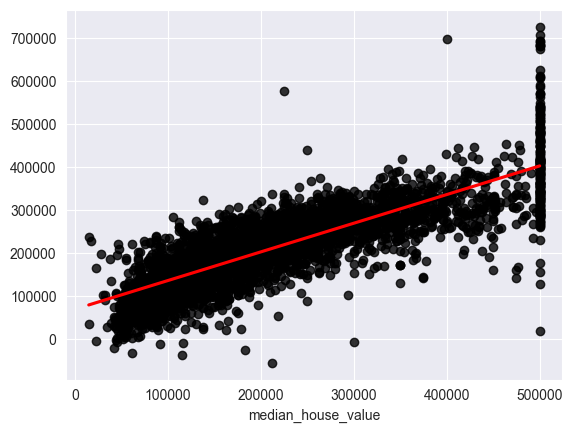

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={'color':'black'},line_kws={'color':'red'})